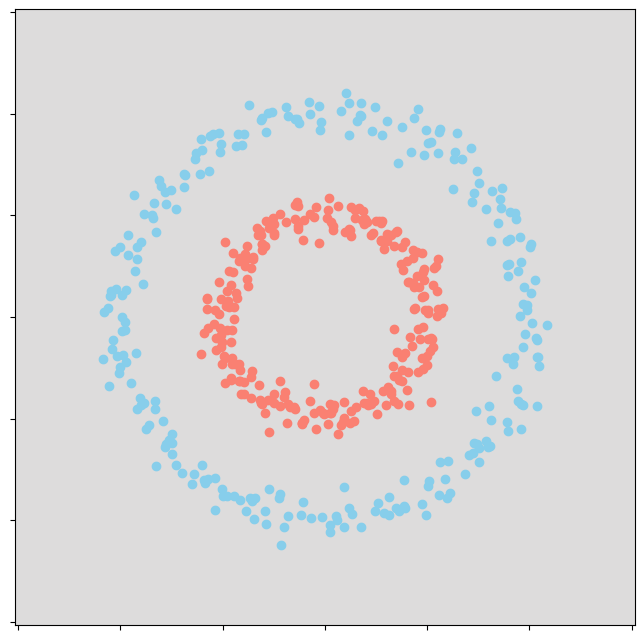

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

X,Y=make_circles(n_samples=500,factor=0.5,noise=0.05)

#resolucion del mapa de prediccion:
res=100

#coordenadas del mapa de prediccion:
_x0=np.linspace(-1.5,1.5,res)
_x1=np.linspace(-1.5,1.5,res)

#input con cada combo de coordenadas del mapa de prediccion:

_px=np.array(np.meshgrid(_x0,_x1)).T.reshape(-1,2)

#objeto vacio a 0.5 del mapa de prediccion :
_py=np.zeros((res,res))+0.5

#visualizacion del mapa de prediccion:
plt.figure(figsize=(8,8))
plt.pcolormesh(_x0,_x1,_py,cmap='coolwarm',vmin=0,vmax=1)

#visualizacion de la nuve de datos:
plt.scatter(X[Y==0,0], X[Y==0,1], c='skyblue')
plt.scatter(X[Y==1,0], X[Y==1,1], c='salmon')


plt.tick_params(labelbottom=False,labelleft=False)

In [2]:
# keras:

import tensorflow as tf
import tensorflow.keras as kr

from IPython.core.display import display,HTML


lr=0.01
nn=[2,16,8,1] #numero de neuronas por capa 

# creamos el objeto que contendra a nuestra red neuronal , como secuencia de capas 
model = kr.Sequential()

#a;adimos la capa 1:
l1=model.add(kr.layers.Dense(nn[1],activation='relu'))

#a;adimos la capa 2:
l2=model.add(kr.layers.Dense(nn[2],activation='relu'))

#a;adimos la capa 3:
l3=model.add(kr.layers.Dense(nn[3],activation='sigmoid'))


C:\Users\jhinn\AppData\Local\Temp\ipykernel_16740\3732692120.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display,HTML


In [6]:
#compilamos el modelo definiendo la funcion de coste y el optimizador 

model.compile(loss='mse',optimizer=kr.optimizers.SGD(learning_rate=lr),metrics=['mae'])

#se entrena el modelo
model.fit(X,Y,epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2363 - mae: 0.4827  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.2376 - mae: 0.4843
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.2374 - mae: 0.4843
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.2400 - mae: 0.4872
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.2342 - mae: 0.4811
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.2364 - mae: 0.4835
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.2364 - mae: 0.4836
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.2350 - mae: 0.4823
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 0.2358 - mae: 0.4832
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - loss: 0.2332 - mae: 0.4803
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - loss: 0.2343 - mae: 0.4815
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.2301 - mae: 0.4771
Epoch 13/100


In [7]:
#con sklearn:

import sklearn as sk
import sklearn.neural_network

clf=sk.neural_network.MLPRegressor(solver='sgd',
                                   learning_rate_init=lr,
                                   hidden_layer_sizes=tuple(nn[1:]),
                                   verbose=True,
                                   n_iter_no_change=1000,
                                   batch_size=64)

clf.fit(X,Y)
                                

Iteration 1, loss = 1.03126532
Iteration 2, loss = 0.42953199
Iteration 3, loss = 0.15656087
Iteration 4, loss = 0.13079700
Iteration 5, loss = 0.14057014
Iteration 6, loss = 0.13462434
Iteration 7, loss = 0.12716999
Iteration 8, loss = 0.12500621
Iteration 9, loss = 0.12522203
Iteration 10, loss = 0.12526964
Iteration 11, loss = 0.12517542
Iteration 12, loss = 0.12507267
Iteration 13, loss = 0.12510457
Iteration 14, loss = 0.12511846
Iteration 15, loss = 0.12506838
Iteration 16, loss = 0.12504432
Iteration 17, loss = 0.12506849
Iteration 18, loss = 0.12507300
Iteration 19, loss = 0.12502912
Iteration 20, loss = 0.12506842
Iteration 21, loss = 0.12504603
Iteration 22, loss = 0.12503192
Iteration 23, loss = 0.12501886
Iteration 24, loss = 0.12508411
Iteration 25, loss = 0.12504041
Iteration 26, loss = 0.12506311
Iteration 27, loss = 0.12507168
Iteration 28, loss = 0.12505221
Iteration 29, loss = 0.12513444
Iteration 30, loss = 0.12506477
Iteration 31, loss = 0.12504962
Iteration 32, los

c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=(16, 8, 1),
             learning_rate_init=0.01, n_iter_no_change=1000, solver='sgd',
             verbose=True)